In [1]:
import sys
import cv2
import copy 
sys.path.insert(1, '../../src/')
import matplotlib.pyplot as plt
from wholebodypose.models.rtmpose.model import RTMPoseModel
from wholebodypose.utils.vision import DrawerPose
draw_skeleton = DrawerPose()

In [2]:
from wholebodypose.models.mediapipe.model import MediapipeModel
mode_coco = True
#kpt_thr = 0.5
#model = MediapipeModel(mode_coco=mode_coco,use_thresholding=False,kpt_thr=0.5)

In [3]:
#!pip install onnxruntime-gpu==1.17.1

In [4]:
#!pip install onnxruntime==1.17.1

In [5]:
#!pip uninstall -y onnxruntime

In [6]:
#pip uninstall -y onnxruntime-gpu

In [7]:
#!pip install numpy==1.23.4

In [8]:
#!pip uninstall -y numpy

In [9]:
import numpy
numpy.__version__

'1.23.4'

In [10]:
import cv2
cv2.__version__

'4.11.0'

In [11]:
#!rm -r /root/.cache/rtmlib/hub/checkpoints/

In [12]:
#model = RTMPoseModel(mode='performance',backend='onnxruntime', device='cpu',use_thresholding=True,filter_noise=True,kpt_thr=2.5)
model = RTMPoseModel(mode='performance',backend='onnxruntime', device='cuda',use_thresholding=True,filter_noise=True,kpt_thr=2.5)

Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/onnx_sdk/yolox_m_8xb8-300e_humanart-c2c7a14a.zip" to /root/.cache/rtmlib/hub/checkpoints/yolox_m_8xb8-300e_humanart-c2c7a14a.zip
100% 89.9M/89.9M [00:21<00:00, 4.40MB/s]
2025-07-23 10:46:44.774101058 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-07-23 10:46:44.774304388 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.
Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmw/onnx_sdk/rtmw-dw-x-l_simcc-cocktail14_270e-384x288_20231122.zip" to /root/.cache/rtmlib/hub/checkpoints/rtmw-dw-x-l_simcc-cocktail14_270e-384x288_20231122.zip


load /root/.cache/rtmlib/hub/checkpoints/yolox_m_8xb8-300e_humanart-c2c7a14a.onnx with onnxruntime backend


100% 204M/204M [00:59<00:00, 3.60MB/s] 


load /root/.cache/rtmlib/hub/checkpoints/rtmw-dw-x-l_simcc-cocktail14_270e-384x288_20231122.onnx with onnxruntime backend


2025-07-23 10:48:00.958139110 [W:onnxruntime:, graph.cc:3593 CleanUnusedInitializersAndNodeArgs] Removing initializer '1701'. It is not used by any node and should be removed from the model.
2025-07-23 10:48:00.958779160 [W:onnxruntime:, graph.cc:3593 CleanUnusedInitializersAndNodeArgs] Removing initializer '1706'. It is not used by any node and should be removed from the model.
2025-07-23 10:48:00.959176807 [W:onnxruntime:, graph.cc:3593 CleanUnusedInitializersAndNodeArgs] Removing initializer '1709'. It is not used by any node and should be removed from the model.
2025-07-23 10:48:01.994485857 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-07-23 10:48:01.995080181 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose outpu

# Generate Points

In [13]:
ls ../../data/videos/

17165.mp4*       GIVE_24651.mp4*  GIVE_69343.mp4*
GIVE_24649.mp4*  GIVE_24660.mp4*  README.md*


In [14]:
import traceback
import numpy as np

# define a video capture object 
#vid = cv2.VideoCapture("/media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Datasets/wlasl-complete/videos/17165.mp4")#68508.mp4")#54563.mp4")#68914.mp4") 

#vid = cv2.VideoCapture("/media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Datasets/WLASL/wlasl-complete-21k/videos/17165.mp4")
#vid = cv2.VideoCapture("/data/cristian/paper_2025/WLASL_videos/WLASL/videos/17165.mp4")

#vid = cv2.VideoCapture("../../data/videos/GIVE_24649.mp4")
vid = cv2.VideoCapture("../../data/videos/17165.mp4")

#vid = cv2.VideoCapture(0)
kpt_thr = 0.2

cv2.namedWindow("frame", cv2.WINDOW_NORMAL) 

list_keypoints = []
list_scores = []
cnt = 0

while(True): 
    
    ret, frame = vid.read() 
    if ret is None or frame is None:
        break
    
    frame = cv2.resize(frame,(640,480))
    #"""
    try:
        frame_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

        keypoints, scores  = model.predict(frame_rgb)
        list_keypoints.append(keypoints[0,:,:])
        list_scores.append(scores[0,:])


        frame_original = draw_skeleton(copy.deepcopy(frame), keypoints, scores, kpt_thr=kpt_thr,
                                    line_width=1,radius=1)
                
        score_value = np.round(scores[0,99],2)
        key_p1 = np.round(keypoints[0,99,0],2)
        key_p2 = np.round(keypoints[0,99,1],2)
        cnt+=1       
        print("cnt:",cnt)

        frame_original = cv2.putText(frame_original, 
                    f'point 99:i={cnt},s={str(score_value)[:4]},k={str(key_p1)[:6]},{str(key_p2)[:6]}', 
                    (10, 30) ,cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0) , 2, cv2.LINE_AA) 
        
        cv2.imshow('frame', frame_original) 
        #cv2.waitKey()
        
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break
    except:
        print(traceback.format_exc())
        break
    #"""
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 

cnt: 1
cnt: 2
cnt: 3
cnt: 4
cnt: 5
cnt: 6
cnt: 7
cnt: 8
cnt: 9
cnt: 10
cnt: 11
cnt: 12
cnt: 13
cnt: 14
cnt: 15
cnt: 16
cnt: 17
cnt: 18
cnt: 19
cnt: 20
cnt: 21
cnt: 22
cnt: 23
cnt: 24
cnt: 25
cnt: 26
cnt: 27
cnt: 28


In [15]:
scores

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]], dtype=float32)

In [16]:
list_keypoints = np.array(list_keypoints)
list_scores = np.array(list_scores)
list_keypoints.shape,list_scores.shape

((28, 133, 2), (28, 133))

# Filtering Code

In [17]:
#!pip install padasip

In [18]:
import cv2
import numpy as np
from padasip.filters import AdaptiveFilter,FilterNLMS

def initialize_adaptive_filter(num_keypoints,mu=0.9):
    filters = []
    for _ in range(num_keypoints):
        #filter_x = AdaptiveFilter(n=1, mu=0.00005, w="zeros")
        #filter_y = AdaptiveFilter(n=1, mu=0.00005, w="zeros")
        
        filter_x = FilterNLMS(2, mu=mu,w="random")
        filter_y = FilterNLMS(2, mu=mu,w="random")
        filter_z = FilterNLMS(2, mu=mu,w="random")

        filters.append((filter_x, filter_y,filter_z))
    return filters

ModuleNotFoundError: No module named 'padasip'

In [ ]:
#!pip install filterpy

In [ ]:
class KeypointMemory:
    def __init__(self, window=10):
        self.window = window
        self.last_high_score_frame = -np.inf
        self.last_high_score_kp = None
        self.last_high_score_value = 0

    def update(self, frame_idx, keypoint, score, high_thresh):
        if score >= high_thresh:
            self.last_high_score_frame = frame_idx
            self.last_high_score_kp = keypoint
            self.last_high_score_value = score

    def get(self, frame_idx):
        if frame_idx - self.last_high_score_frame <= self.window:
            return self.last_high_score_kp, self.last_high_score_value
        else:
            return None, None


In [39]:
def track_keypoints(t, keypoints, scores, adaptive_filters, memories,
                    low=0.25, high=0.5, interp_alpha=0.5):
    keypoints_pred = np.zeros_like(keypoints)
    scores_pred    = np.zeros_like(scores)

    for i in range(len(keypoints)):
        x, y = keypoints[i]
        score = scores[i]
        filter_x, filter_y, filter_s = adaptive_filters[i]
        memory = memories[i]

        input_vec = np.array([t, int(score > high)])

        # Predicción del filtro
        pred_x = filter_x.predict(x=input_vec)
        pred_y = filter_y.predict(x=input_vec)
        pred_s = filter_s.predict(x=input_vec)

        if score >= high:
            # Score confiable: usar directamente
            filtered_x, filtered_y, filtered_s = x, y, score
            memory.update(t, [x, y], score, high)
            # Adaptación del filtro con observación actual
            filter_x.adapt(x=input_vec, d=filtered_x)
            filter_y.adapt(x=input_vec, d=filtered_y)
            filter_s.adapt(x=input_vec, d=filtered_s)
            
        elif score < low:
            # Score bajo: ¿puedo mantener último bueno?
            remembered_kp, remembered_score = memory.get(t)
            if remembered_kp is not None:
                filtered_x, filtered_y = remembered_kp
                remembered_score= remembered_score - (0.02 if remembered_score>0 else 0)
                filtered_s = remembered_score
            else:
                # No tengo buena memoria reciente: usar predicción
                filtered_x, filtered_y, filtered_s = pred_x, pred_y, pred_s
            # Adaptación del filtro con observación actual
            filter_x.adapt(x=input_vec, d=x)
            filter_y.adapt(x=input_vec, d=y)
            filter_s.adapt(x=input_vec, d=score)
        else:
            # Interpolación media
            filtered_x = interp_alpha * x + (1 - interp_alpha) * pred_x
            filtered_y = interp_alpha * y + (1 - interp_alpha) * pred_y
            filtered_s = interp_alpha * score + (1 - interp_alpha) * pred_s
            memory.update(t, [filtered_x, filtered_y], filtered_s, high)
    
            # Adaptación del filtro con observación actual
            filter_x.adapt(x=input_vec, d=filtered_x)
            filter_y.adapt(x=input_vec, d=filtered_y)
            filter_s.adapt(x=input_vec, d=filtered_s)

        #filter_x.adapt(x=input_vec, d=x)
        #filter_y.adapt(x=input_vec, d=y)
        #filter_s.adapt(x=input_vec, d=score)
        keypoints_pred[i] = [filtered_x, filtered_y]
        scores_pred[i] = filtered_s

    return keypoints_pred, scores_pred


In [40]:
class KeypointMemory:
    def __init__(self, window=10):
        self.window = window
        self.last_frame = -np.inf
        self.last_pred_kp = None
        self.last_pred_score = 0

    def update(self, frame_idx, pred_kp, pred_score):
        self.last_frame = frame_idx
        self.last_pred_kp = pred_kp
        self.last_pred_score = pred_score

    def get(self, frame_idx):
        if frame_idx - self.last_frame <= self.window:
            return self.last_pred_kp, self.last_pred_score
        else:
            return None, None


In [41]:
def track_keypoints(t, keypoints, scores, adaptive_filters, memories,
                    low=0.25, high=0.5, interp_alpha=0.5):
    keypoints_pred = np.zeros_like(keypoints)
    scores_pred    = np.zeros_like(scores)

    for i in range(len(keypoints)):
        x, y = keypoints[i]
        score = scores[i]
        filter_x, filter_y, filter_s = adaptive_filters[i]
        memory = memories[i]

        score_vec = score
        if score>high:
            score_vec = 1
        else:
            score_vec = score/high
        input_vec = np.array([t, score_vec])#int(score > high)])

        # Predicción del filtro
        pred_x = filter_x.predict(x=input_vec)
        pred_y = filter_y.predict(x=input_vec)
        pred_s = filter_s.predict(x=input_vec)

        if score >= high:
            # Confianza alta → usar valor observado
            filtered_x, filtered_y, filtered_s = x, y, score

        elif score < low:
            # Confianza baja → intentar usar memoria si existe
            remembered_kp, remembered_score = memory.get(t)
            if remembered_kp is not None:
                filtered_x, filtered_y = remembered_kp
                filtered_s = max(0.0, remembered_score - 0.05)
            else:
                # Sin memoria válida → usar predicción
                filtered_x, filtered_y, filtered_s = 0,0,0 #pred_x, pred_y, pred_s

        else:
            # Score medio → interpolar entre predicción y observación
            filtered_x = interp_alpha * x + (1 - interp_alpha) * pred_x
            filtered_y = interp_alpha * y + (1 - interp_alpha) * pred_y
            filtered_s = interp_alpha * score + (1 - interp_alpha) * pred_s
            print("x:",x,"pred_x:",pred_x,"filtered_x:",filtered_x)
        # Adaptar el filtro con observación (x, y, score), no el filtrado
        filter_x.adapt(x=input_vec, d=x)
        filter_y.adapt(x=input_vec, d=y)
        filter_s.adapt(x=input_vec, d=score)

        # ✅ Solo actualizar la memoria si el score no es muy bajo
        if filtered_s >= low:
            memory.update(t, [filtered_x, filtered_y], filtered_s)

        # Guardar resultados
        keypoints_pred[i] = [filtered_x, filtered_y]
        scores_pred[i] = filtered_s

    return keypoints_pred, scores_pred


In [42]:
list_keypoints = np.array(list_keypoints)
list_scores = np.array(list_scores)
list_keypoints.shape,list_scores.shape

((94, 133, 2), (94, 133))

90
[319.90780534 320.20959473 319.74108717 321.14911694]


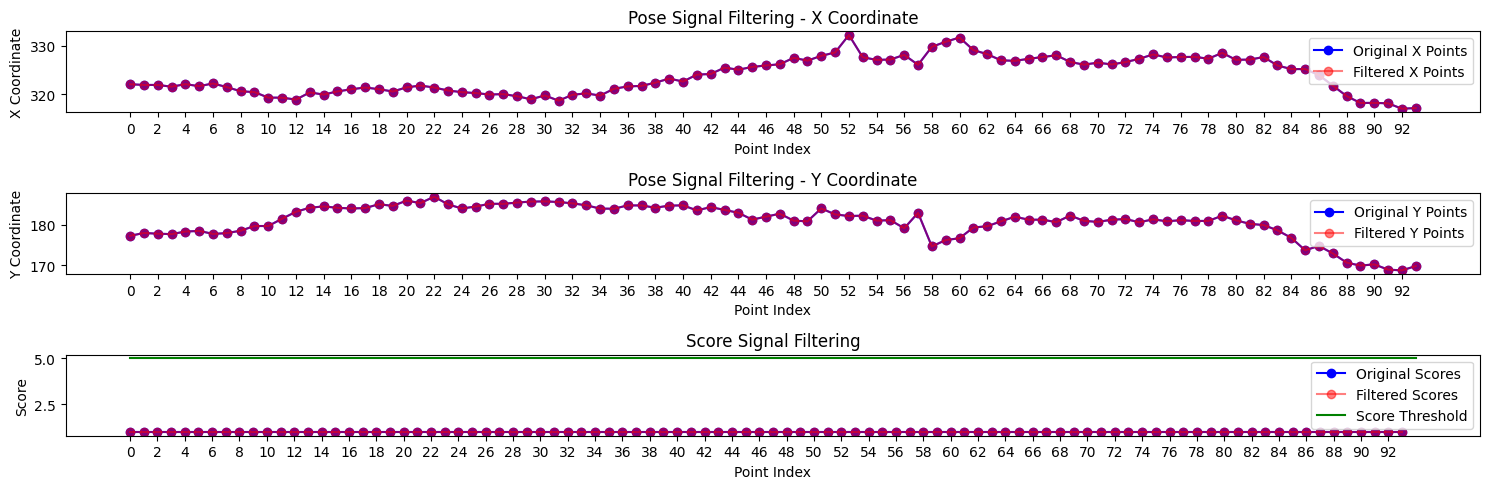

91
[285.83554395 283.30451965 281.50505405 282.21961848]


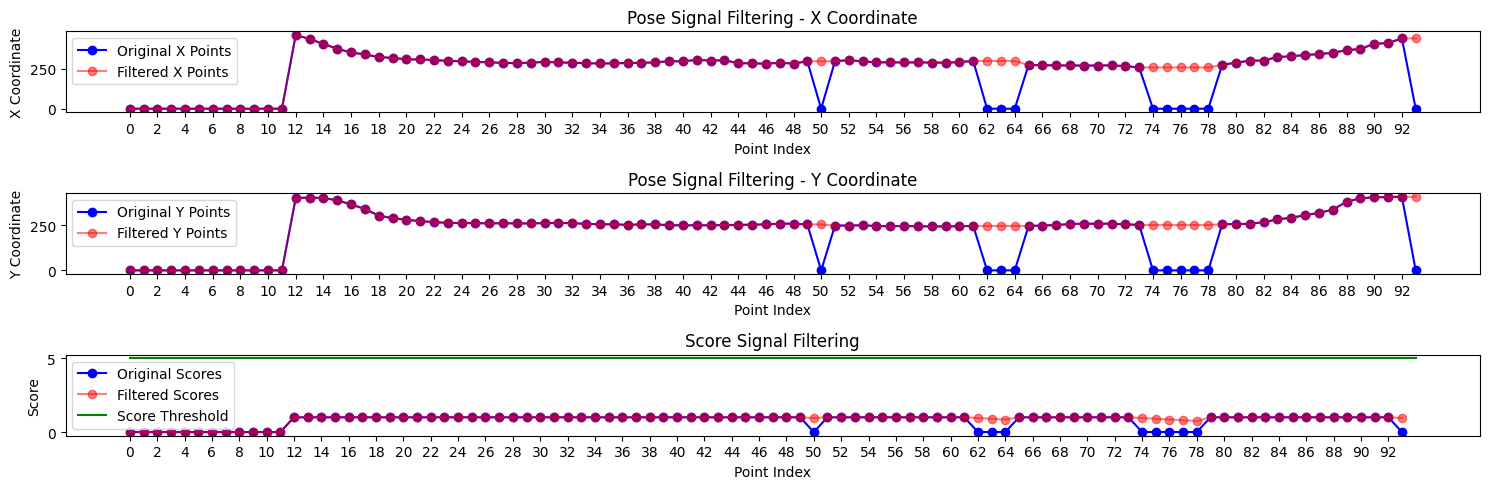

121
[235.57895841 228.42004903 232.34444004 235.50422033]


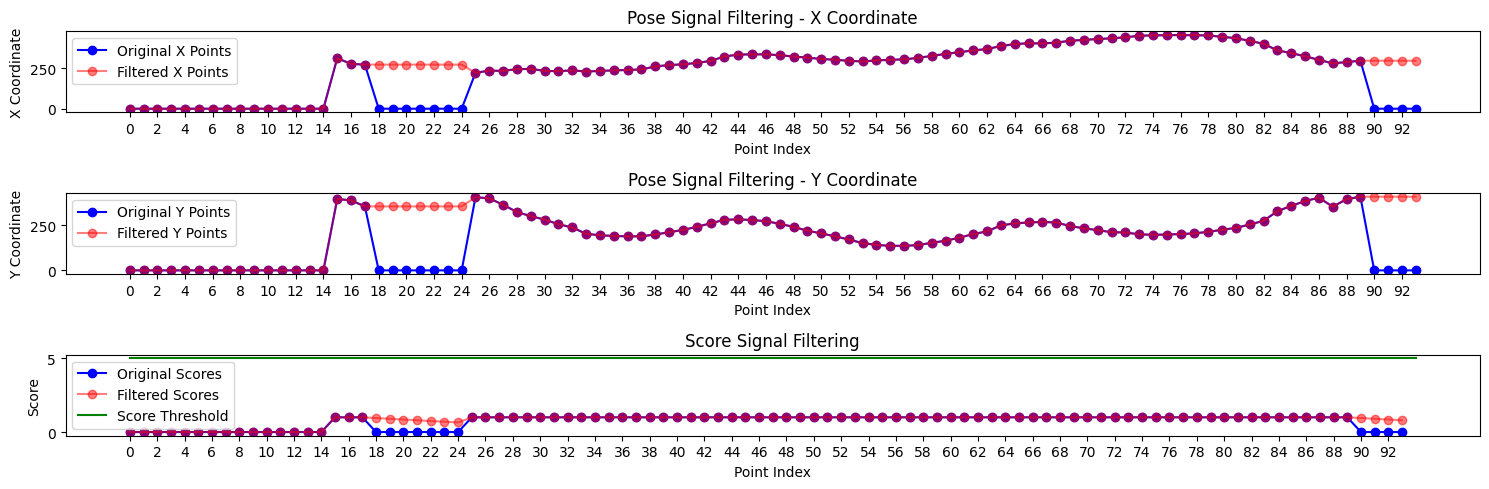

In [43]:
for id in [90,91,121]:    
    print(id)
    # Inicializar los filtros adaptativos para cada keypoint
    num_keypoints = 10  # o 135*2 = 270 points
    adaptive_filters = initialize_adaptive_filter(num_keypoints,mu=0.5)
     
    memories = [KeypointMemory(window=5) for _ in range(num_keypoints)]
    
    
    # Coordinates x,y of index 99 and scores of pose estimation model
    points_x      = list_keypoints[:,id,0] 
    points_y      = list_keypoints[:,id,1]
    scores_points = list_scores[:,id]
    
    points_x_pred      = np.zeros_like(points_x)
    points_y_pred      = np.zeros_like(points_y)
    scores_points_pred = np.zeros_like(scores_points)
    
    # Simulation of filtering of coordinates frame by frame
    for i in range(len(points_x)):
        keyp_aux   = [[points_x[i],points_y[i]]]
        scores_aux = [scores_points[i]]
        
        # filtering data (TO DO)
        #print("keyp_aux.shape:",np.array(keyp_aux).shape) # (1,2)
        #print("scores_aux.shape:",np.array(scores_aux).shape) # (1,)
        keyp_pred,scores_pred = track_keypoints(i,keyp_aux,scores_aux, adaptive_filters,memories)#,
                                               #low=2.5, high=4.5) #RTMPOSE low=1, high=2.5
        
        # save data predicted
        points_x_pred[i] = keyp_pred[0][0]
        points_y_pred[i] = keyp_pred[0][1]
        scores_points_pred[i] = scores_pred[0]
    
    
    n = len(points_x)
    fig = plt.figure(figsize=(15,5))
    
    plt.subplot(3,1,1)
    plt.plot(points_x, '-ob', label='Original X Points')
    plt.plot(points_x_pred, '-or', alpha=0.5, label='Filtered X Points')
    print(points_x_pred[32:36])
    plt.xticks(np.arange(0, n, step=2))
    plt.xlabel('Point Index')
    plt.ylabel('X Coordinate')
    plt.title('Pose Signal Filtering - X Coordinate')
    plt.legend()
    
    plt.subplot(3,1,2)
    plt.plot(points_y, '-ob', label='Original Y Points')
    plt.plot(points_y_pred, '-or', alpha=0.5, label='Filtered Y Points')
    plt.xticks(np.arange(0, n, step=2))
    plt.xlabel('Point Index')
    plt.ylabel('Y Coordinate')
    plt.title('Pose Signal Filtering - Y Coordinate')
    plt.legend()
    
    plt.subplot(3,1,3)
    plt.plot(scores_points, '-ob', label='Original Scores')
    plt.plot(scores_points_pred, '-or', alpha=0.5, label='Filtered Scores')
    #plt.plot([0, len(points_x)], [0.5, 0.5], '-g', label='Score Threshold')
    plt.plot([0, len(points_x)], [5, 5], '-g', label='Score Threshold')
    plt.xticks(np.arange(0, n, step=2))
    plt.xlabel('Point Index')
    plt.ylabel('Score')
    plt.title('Score Signal Filtering')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [26]:
import traceback
import numpy as np
import time

kpt_thr = 0.2

# define a video capture object 
#vid = cv2.VideoCapture("/media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Datasets/wlasl-complete/videos/17165.mp4")#68508.mp4")#54563.mp4")#68914.mp4") 


num_keypoints = 133
adaptive_filters = initialize_adaptive_filter(num_keypoints,mu=1.05)
memories = [KeypointMemory(window=5) for _ in range(num_keypoints)]


#vid = cv2.VideoCapture("/media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Datasets/WLASL/wlasl-complete-21k/videos/17165.mp4")
vid = cv2.VideoCapture("../../data/videos/17165.mp4")

#vid = cv2.VideoCapture(0)
cv2.namedWindow("frame", cv2.WINDOW_NORMAL) 

list_keypoints_new = []
list_scores_new = []
cnt = 0

while(True): 
    
    ret, frame = vid.read() 
    if ret is None or frame is None:
        break
    
    frame = cv2.resize(frame,(640,480))
    
    try:
        frame_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

        
        #POSE ESTIMATION MODEL
        keypoints, scores  = model.predict(frame_rgb)
        list_keypoints_new.append(keypoints[0,:,:])
        list_scores_new.append(scores[0,:])
        
        # FILTERING
        keypoints_filtered       = np.zeros_like([[[0,0] for i in range(num_keypoints)]],dtype=float)
        scores_filtered          = np.zeros_like([[0 for i in range(num_keypoints)]],dtype=float)
        keyp_pred,scores_pred  = track_keypoints(cnt,keypoints[0,:,:],scores[0,:], adaptive_filters,memories)            
        keypoints_filtered[0]  = keyp_pred
        scores_filtered[0]     = scores_pred
        #print(scores_pred[121])
        
        #DRAWING        
        frame_original = draw_skeleton(copy.deepcopy(frame), keypoints_filtered, scores_filtered, kpt_thr=kpt_thr,
                                    line_width=2,radius=2)
        
       
        score_value = np.round(scores[0,121],2)
        key_p1 = np.round(keypoints[0,121,0],2)
        key_p2 = np.round(keypoints[0,121,1],2)
        cnt+=1        

        frame_original = cv2.putText(frame_original, 
                    f'point 121:i={cnt},s={str(score_value)[:4]},k={str(key_p1)[:6]},{str(key_p2)[:6]}', 
                    (10, 30) ,cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0) , 2, cv2.LINE_AA) 

        score_value = np.round(scores_filtered[0,121],2)
        key_p1 = np.round(keypoints_filtered[0,121,0],2)
        key_p2 = np.round(keypoints_filtered[0,121,1],2)
        #cnt+=1        

        frame_original = cv2.putText(frame_original, 
                    f'pred point 121:i={cnt},s={str(score_value)[:4]},k={str(key_p1)[:6]},{str(key_p2)[:6]}', 
                    (10, 60) ,cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0) , 2, cv2.LINE_AA) 
        
        cv2.imshow('frame', frame_original) 
        #cv2.waitKey()

        # DELAY TO SEE THE VIDEO SLOWLY
        time.sleep(0.2)
        
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break
    except:
        print(traceback.format_exc())
        break
    
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 